# 1. Load Data

In [1]:
import numpy as np
from clinnet.data_loader_sydney import SydneyData

In [2]:
data = SydneyData(data_dir='data\sydney_data', coding_gene=True, unique_feature=False, balance='undersample', split_cnvs=True, n_split=20, unique_sample=False)

In [3]:
x_train, y_train, x_valid, y_valid, x_test, y_test, genes, gene_status, class_weight = data.get_kf(kf=3)

In [4]:
print(f"x_train: {x_train.shape}")
print(f"x_valid: {x_valid.shape}")
print(f"x_test:  {x_test.shape}")

print(f"y_train: {y_train.shape}, {np.unique(y_train, return_counts=True)}")
print(f"y_valid: {y_valid.shape}, {np.unique(y_valid, return_counts=True)}")
print(f"y_test:  {y_test.shape}, {np.unique(y_test, return_counts=True)}")

print(f"genes: {genes.shape}")
print(f"gene_status: {gene_status}")
print(f"class_weight: {class_weight}")

x_train: (42594, 36460)
x_valid: (2367, 36460)
x_test:  (2367, 36460)
y_train: (42594, 1), (array([0, 1]), array([21297, 21297], dtype=int64))
y_valid: (2367, 1), (array([0, 1]), array([1184, 1183], dtype=int64))
y_test:  (2367, 1), (array([0, 1]), array([1183, 1184], dtype=int64))
genes: (18230,)
gene_status: ['CNV_AMP' 'CNV_DEL']
class_weight: {0: 1.0, 1: 1.0}


# 2. Model

In [5]:
from clinnet.model import CLinNET, load_clinnet

In [6]:
clinnet_model = CLinNET(genes, gene_status, tissue='nervous system',
                        saving_dir='SydneyDataset_Run0',
                        n_hids={'GO':5,'Reactome':5}, ex_source='fantom',
                       w_regs={'Diag': 0.,
                                            'GO':[0]*10,'Reactome':[0]*10},
                       w_regs_outcome={'GS':.000005,'Diag':.0,
                                        'GO':[.0]*10,'Reactome':[0]*10},
                        learning_rate=.0007, 
                        drop_rate=[.2, .1, .1, .0, .0, .0],
                        verbose=True)

In [7]:
clinnet_model.train(x_train, y_train, x_valid, y_valid, class_weight=class_weight, batch_size=200, epochs=200, verbose=2)

Epoch 1/200
213/213 - 20s - loss: 180.4519 - Input_Dense_loss: 0.6546 - GS_Dense_loss: 0.6624 - Diag_Dense_loss: 0.6942 - Hidd1_Dense_GO_loss: 0.6997 - Hidd2_Dense_GO_loss: 0.7021 - Hidd3_Dense_GO_loss: 0.7105 - Hidd4_Dense_GO_loss: 0.7388 - Hidd5_Dense_GO_loss: 0.6936 - Hidd1_Dense_Reactome_loss: 0.7059 - Hidd2_Dense_Reactome_loss: 0.7082 - Hidd3_Dense_Reactome_loss: 0.7142 - Hidd4_Dense_Reactome_loss: 0.7262 - Hidd5_Dense_Reactome_loss: 0.7309 - Input_Dense_f1: 0.6768 - Input_Dense_accuracy: 0.6981 - Input_Dense_auc: 0.7615 - Input_Dense_recall: 0.6278 - Input_Dense_precision: 0.7306 - GS_Dense_f1: 0.6470 - GS_Dense_accuracy: 0.6679 - GS_Dense_auc_1: 0.7319 - GS_Dense_recall_1: 0.6018 - GS_Dense_precision_1: 0.6935 - Diag_Dense_f1: 0.3608 - Diag_Dense_accuracy: 0.5042 - Diag_Dense_auc_2: 0.5065 - Diag_Dense_recall_2: 0.5196 - Diag_Dense_precision_2: 0.5041 - Hidd1_Dense_GO_f1: 0.3626 - Hidd1_Dense_GO_accuracy: 0.4991 - Hidd1_Dense_GO_auc_3: 0.5008 - Hidd1_Dense_GO_recall_3: 0.5439 - 

INFO:tensorflow:Assets written to: result\SydneyDataset_Run0\nervous system\saved_model\weights\assets


INFO:tensorflow:Assets written to: result\SydneyDataset_Run0\nervous system\saved_model\weights\assets


In [ ]:
clinnet_model.evaluate(x_valid, y_valid, x_test, y_test, converge_method='average')

74/74 [==============================] - 0s 5ms/step


{'Threshold': 0.3599999999999999,
 'Accuracy': 0.775993237531699,
 'Precision': 0.7851528384279476,
 'Sensitivity_recall': 0.7599323753169906,
 'Specificity': 0.7920540997464074,
 'F1_score': 0.7723367697594502,
 'AUC': 0.8359644127249304}

In [9]:
clinnet_model.save_predictions(x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid, x_test=x_test, y_test=y_test)

3/3 [==============================] - 0s 45ms/step


In [ ]:
#clinnet_model = load_clinnet('result/SydneyDataset_Run1/nervous system')

# 3. Interpretability

## 3.1 SHAP

In [9]:
from clinnet.shap import SHAP

In [10]:
shap = SHAP(clinnet_model, train_n_sample=1000, test_n_sample=1500)

In [11]:
shap.get_layer_shap(clinnet_model.model, x_train, x_test, y_train, y_test)

In [12]:
shap.save_shap_csv()
shap.save_shap_plot()

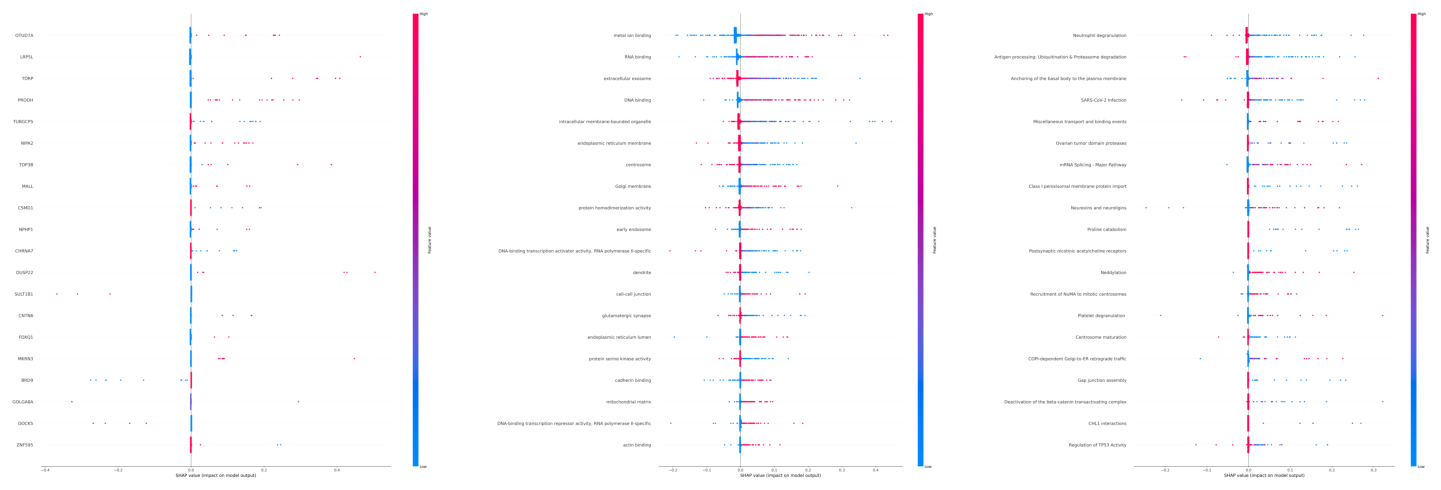

In [ ]:
# Sample of SHAP values
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Paths to your images
image_1_path = r"nervous system\interpretability\SHAP\Diag.png"
image_2_path = r"nervous system\interpretability\SHAP\Hidd1_GO.png"
image_3_path = r"nervous system\interpretability\SHAP\Hidd1_Reactome.png"

img1 = mpimg.imread(image_1_path)
img2 = mpimg.imread(image_2_path)
img3 = mpimg.imread(image_3_path)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  

axes[0].imshow(img1)
axes[0].axis('off') 
axes[1].imshow(img2)
axes[1].axis('off')
axes[2].imshow(img3)
axes[2].axis('off')

plt.tight_layout()
plt.show()

## 3.2 Sankey

In [13]:
from clinnet.sankey import Sankey

In [14]:
sankey = Sankey(shap.graph, shap.interpret_dir, sv_norm=shap.sv_norm, gene_status=gene_status)

In [ ]:
sankey.plot_sankey(use_abb=True)

# Uncertainty mitigation

74/74 [==============================] - 0s 5ms/step


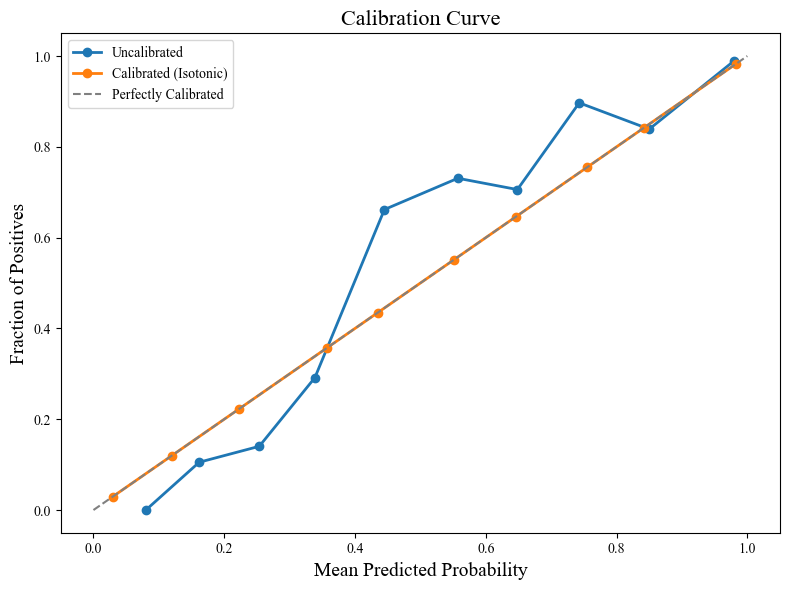

74/74 [==============================] - 0s 5ms/step
Test Accuracy after calibration: 0.7764158918005072
Test Brier Score after calibration: 0.1582804045417355


In [ ]:
from clinnet.uncertainty import ModelCalibrator

calibrator = ModelCalibrator(clinnet_model)
calibrator.calibrate_model(x_train, y_train, x_valid, y_valid)
y_prob_train_calibrated, y_prob_valid_calibrated = calibrator.calibrate_model(x_train, y_train, x_valid, y_valid)
calibrator.plot_calibration_curve(y_valid, calibrator.predict_probabilities(x_valid), y_prob_valid_calibrated, "Calibration Curve")
y_prob_test_calibrated = calibrator.calibrate_test(x_test, y_test)

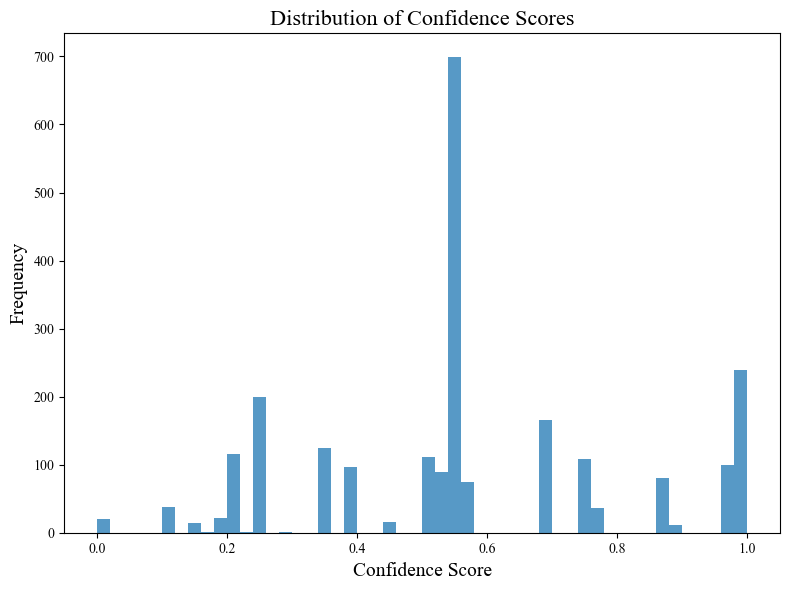

Optimal Youden's Index at Coverage >= 0.70
Youden's Index: 0.663301469919026
Coverage: 0.7252747252747253
Optimal Youden's Index at Coverage >= 0.70
Youden's Index: 0.663301469919026
Coverage: 0.7252747252747253


,Confidence Threshold,Accuracy,F1 Score,Recall (Sensitivity),Precision,Specificity,Youden's Index,Coverage
0,0.00,0.764159,0.774089,0.808115,0.742813,0.720203,0.528318,1.000000
1,0.01,0.766411,0.775410,0.806479,0.746646,0.726343,0.532822,0.991547
2,0.02,0.766411,0.775410,0.806479,0.746646,0.726343,0.532822,0.991547
3,0.03,0.766411,0.775410,0.806479,0.746646,0.726343,0.532822,0.991547
4,0.04,0.766411,0.775410,0.806479,0.746646,0.726343,0.532822,0.991547


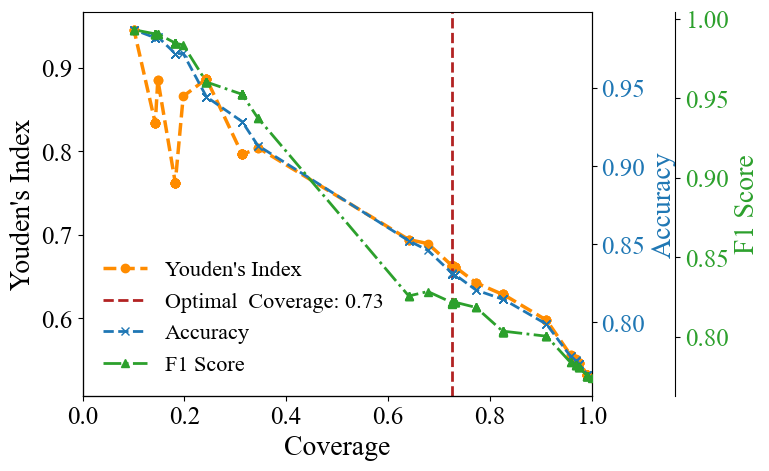

In [ ]:
from clinnet.uncertainty import UncertaintyModel

prediction_threshold = 0.359

uncertainty_model = UncertaintyModel(y_test, y_prob_test_calibrated, prediction_threshold)

# Evaluate uncertainty
results_df = uncertainty_model.evaluate_un()

# Find optimal point and plot evaluation metrics
optimal_point = uncertainty_model.find_dynamic_optimal_point(min_coverage=0.7)
uncertainty_model.plot_evaluation_metrics_with_optimal()
results_df.head(5)

In [ ]:
filtered_results = uncertainty_model.filter_predictions_with_point(x_data=x_test, y_data=y_test, y_prob=y_prob_test_calibrated)
#logging.info("Filtered results: %s", filtered_results)
certain_x_test = filtered_results["Filtered X_data"]
certain_y_test = filtered_results["Filtered Y_data"]

for key, value in filtered_results.items():
    if key in ["Accuracy", "Total Predictions", "Uncertain Predictions Count", "Percentage of Uncertain Predictions"]:
        print(f"{key}: {value}")

Optimal Youden's Index at Coverage >= 0.70
Youden's Index: 0.663301469919026
Coverage: 0.7252747252747253
Accuracy: 0.8315850815850816
Total Predictions: 2366
Uncertain Predictions Count: 650
Percentage of Uncertain Predictions: 27.472527472527474


In [ ]:
clinnet_model.evaluate(x_valid, y_valid, certain_x_test, certain_y_test, converge_method='average')


54/54 [==============================] - 0s 6ms/step


{'Threshold': 0.3599999999999999,
 'Accuracy': 0.8315850815850816,
 'Precision': 0.8740157480314961,
 'Sensitivity_recall': 0.7753201396973225,
 'Specificity': 0.8879813302217037,
 'F1_score': 0.8217149907464528,
 'AUC': 0.8644118218383702}

# 4. Cross Validation

In [5]:
from clinnet.data_loader_sydney import SydneyData
from clinnet.cross_validation import CV

In [7]:
data_params = {'data_dir': r'data\sydney_data', 
               'coding_gene': True, 
               'unique_feature': False, 
               'balance': 'undersample', 
               'split_cnvs': True, 
               'n_split': 20, 
               'unique_sample': False}


model_params = {"build": {"n_hids":{'GO':5,'Reactome':5}, 
                          "ex_source":'fantom', 
                          "w_regs": {'Diag':0,'GO':[0]*10,'Reactome':[0]*10}, 
                          "w_regs_outcome":{'GS':.000005,'Diag':.0,'GO':[.000001]*10,'Reactome':[0]*10}, 
                          "learning_rate":.0007,
                          "drop_rate":[.3, .1, .1, .0, .0, .0], 
                          "verbose":True},

                "train": {"batch_size":200, 
                          "epochs":200,
                          "verbose":2}}

In [8]:
cv = CV(data_class=SydneyData, data_params=data_params, model_params=model_params, tissue='nervous system', saving_dir='Sydney_CV_5')

In [ ]:
cv.run_cross_validation()

In [ ]:
cv.aggregate_result()

# Model Generalisation test

In [ ]:
# Load data
import pandas as pd
import numpy as np

data = np.load('Database\sydney_data\Sydney_schizophrenia.npz')
X_generic = data['X']
Y_generic = data['Y']
Sample_ID1 = data['Sample_ID']
Gene_Annot1 = data['Gene_Annot']

print( Y_generic[Y_generic == 1].shape)
print("X_final.shape:", X_generic.shape)
print("Y_final.shape:",Y_generic.shape)
print("Y_final.mean():", Y_generic.mean() if Y_generic.size > 0 else 'Empty Y_final')

(443,)
X_final.shape: (883, 82520)
Y_final.shape: (883,)
Y_final.mean(): 0.49943374858437145


In [ ]:
# Filter only protoein coden genes

def get_coding_gene(X, genes):
    coding_gene = pd.read_csv(r'Database\selected_genes\protein-coding_gene_with_coordinate_minimal.txt',
                              sep='\t', header=None)
    coding_gene = coding_gene[3]
    coding_gene_mask = pd.Series(genes).isin(coding_gene)
    X = X[:, coding_gene_mask.to_list()]
    genes = genes[coding_gene_mask]
    return X, genes

X_final_coding, genes_coding = get_coding_gene(X_generic,Gene_Annot1[:,1])

In [ ]:
#Filler only those relevant genes to the targeted tissue 

fantom = pd.read_csv(r"database/tissue_expression/FANTOM_tissue_specific_gene_expression.csv")
tissue = "nervous system"
genes_series = pd.Series(genes_coding)

tissue_gene_mask = genes_series.isin(fantom.loc[fantom.loc[:, tissue] > 0, 'geneName'])

X_final_filtered = X_final_coding[:, tissue_gene_mask.to_list()]
genes_filtered = genes_series[tissue_gene_mask].reset_index(drop=True)
genes_filtered = genes_filtered[genes_filtered != genes_filtered.shift()]

print("X_final_filtered.shape:", X_final_filtered.shape)
print("Filtered genes shape:", genes_filtered.shape)


X_final_filtered.shape: (883, 14586)
Filtered genes shape: (14586,)


In [ ]:
# Convert the data to the binary format
def MakeBinaryFeatures(x):
    x1 = (x==1).astype('int8')
    x2 = (x==-1).astype('int8')
    res = np.concatenate([x1,x2], axis=1)
    order = [[i, j] for i,j in zip(range(x.shape[1]), range(x.shape[1],x.shape[1]*2))]
    return res[:, np.array(order).reshape(-1)]
X_final_filtered1= MakeBinaryFeatures(X_final_coding)
X_final_filtered1.shape

(883, 36668)

In [ ]:
from sklearn.model_selection import train_test_split
x_test_G, x_val_G, y_test_G, y_val_G = train_test_split(
    X_final_filtered1, Y_generic, 
    test_size=0.2,       # 20% for validation
    stratify=Y_generic, 
    random_state=111      
)
print("X_test shape:", x_test_G.shape)
print("X_val shape:", x_val_G.shape)
print("y_test shape:", y_test_G.shape)
print("y_val shape:", y_val_G.shape)

X_test shape: (706, 36668)
X_val shape: (177, 36668)
y_test shape: (706,)
y_val shape: (177,)


In [ ]:
clinnet_model.evaluate(x_val_G, y_val_G,x_test_G, y_test_G, converge_method='average')

23/23 [==============================] - 0s 5ms/step


2025-01-03 12:08:34,211 - INFO - Best threshold to maximize the accuracy: 0.8400

2025-01-03 12:08:34,429 - INFO - Confusion matrix plot saved: Result\Sydney_last2025_3_Jan-03_12-04\nervous system\confusion_matrix_2.png
2025-01-03 12:08:34,569 - INFO - ROC curve plot saved: Result\Sydney_last2025_3_Jan-03_12-04\nervous system\ROC_curve_2.png
2025-01-03 12:08:34,569 - INFO - Accuracy, Precision, Sensitivity_recall, Specificity, F1_score, and AUC calculated.
2025-01-03 12:08:34,579 - INFO - Metrices saved: Result\Sydney_last2025_3_Jan-03_12-04\nervous system\metrics_2.txt


{'Threshold': 0.8399999999999996,
 'Accuracy': 0.7379603399433428,
 'Precision': 0.7937062937062938,
 'Sensitivity_recall': 0.6430594900849859,
 'Specificity': 0.8328611898016998,
 'F1_score': 0.7104851330203443,
 'AUC': 0.7575777030551565}